In [5]:
import json
db = json.load(open('D:/GitStudy/pydata-book-2nd-edition/datasets/usda_food/database.json'))

In [6]:
len(db);type(db)#字典列表

list

In [7]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [6]:
import pandas as pd
import numpy as np
nutrients = pd.DataFrame(db[0]['nutrients'])

In [7]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [8]:
db[0]
info_keys = ['description','group','id','manufacturer']
info = pd.DataFrame(db,columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [9]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [10]:
info.group.value_counts().div(info.group.value_counts().sum(0),axis = 0)

Vegetables and Vegetable Products    0.122363
Beef Products                        0.093128
Baked Products                       0.074744
Breakfast Cereals                    0.060729
Fast Foods                           0.055003
Legumes and Legume Products          0.055003
Lamb, Veal, and Game Products        0.051989
Sweets                               0.051386
Fruits and Fruit Juices              0.049427
Pork Products                        0.049427
Beverages                            0.041893
Soups, Sauces, and Gravies           0.041441
Finfish and Shellfish Products       0.038427
Baby Foods                           0.031495
Cereal Grains and Pasta              0.027577
Ethnic Foods                         0.024864
Snacks                               0.024412
Nut and Seed Products                0.019289
Poultry Products                     0.017480
Sausages and Luncheon Meats          0.016727
Dairy and Egg Products               0.016124
Fats and Oils                     

In [11]:
nutrients.info()
type(db)
db1 = pd.DataFrame(db) #直接板列表字典转换成DataFrame
type(db1)
db1.info()
db1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
description    162 non-null object
group          162 non-null object
units          162 non-null object
value          162 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 7 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
nutrients       6636 non-null object
portions        6636 non-null object
tags            6636 non-null object
dtypes: int64(1), object(6)
memory usage: 363.0+ KB


,description,group,id,manufacturer,nutrients,portions,tags
0,"Cheese, caraway",Dairy and Egg Products,1008,,"[{'value': 25.18, 'units': 'g', 'description':...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]
1,"Cheese, cheddar",Dairy and Egg Products,1009,,"[{'value': 24.9, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'cup, diced', 'grams': ...",[]
2,"Cheese, edam",Dairy and Egg Products,1018,,"[{'value': 4.22, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...",[]
3,"Cheese, feta",Dairy and Egg Products,1019,,"[{'value': 5.2, 'units': 'g', 'description': '...","[{'amount': 1, 'unit': 'cup, crumbled', 'grams...",[]
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,,"[{'value': 3.27, 'units': 'g', 'description': ...","[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]",[]


In [12]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [13]:
type(nutrients)
nutrients[:1]
nutrients.info()
nutrients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 5 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
id             389355 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.9+ MB


,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [14]:
nutrients.duplicated().sum()

14179

In [15]:
nutrients = nutrients.drop_duplicates()

In [16]:
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [17]:
col_mapping = {'description' : 'food','group' : 'fgroup'}
info = info.rename(columns = col_mapping,copy =False)

In [19]:
info.head()
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [21]:
col_mapping = {'description' : 'nutrient','group' : 'nutgroup'}
nutrients = nutrients.rename(columns= col_mapping,copy = False)

In [23]:
ndata = pd.merge(nutrients,info,on='id',how='outer')

In [25]:
ndata.info()
ndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


In [30]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)

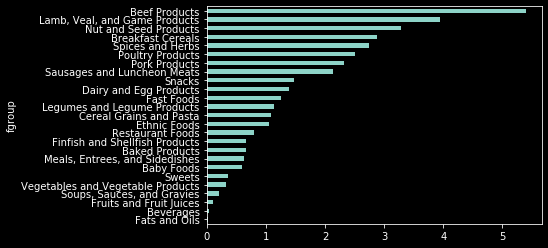

In [37]:
result['Zinc, Zn'].sort_values().plot(kind = 'barh')

In [38]:
by_nutrient = ndata.groupby(['nutgroup','nutrient'])
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]
max_foods = by_nutrient.apply(get_maximum)[['value','food']]

In [50]:
#max_foods.head()
#max_foods.food.str[:50]

grade
a    34
b    45
c    67
Name: value, dtype: int64

In [42]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [52]:
data1 = pd.DataFrame({'id':[0,1,2,3,4,5],'value1':[314,415,213,167,112,217],'value':[34,45,23,67,12,27],'grade':['a','b','b','c','a','b']})
data1


,id,value1,value,grade
0,0,314,34,a
1,1,415,45,b
2,2,213,23,b
3,3,167,67,c
4,4,112,12,a
5,5,217,27,b


In [60]:
data1[['value1','value']].apply(max,0)
#data1[['value1','value']]

value1    415
value      67
dtype: int64

In [63]:
data1.groupby('grade')[['value1','value']].apply(max)

,value1,value
grade,,
a,314,34
b,415,45
c,167,67


Object `apply()` not found.
